In [12]:
import pandas as pd
import sys
sys.path.append('../parsing')
import accessDB as db
df = db.filter(doGeoLoc=False)

In [13]:
callsPerDay = df.groupby(pd.to_datetime(df['Date/Time']).dt.date)['Call Number'].count()

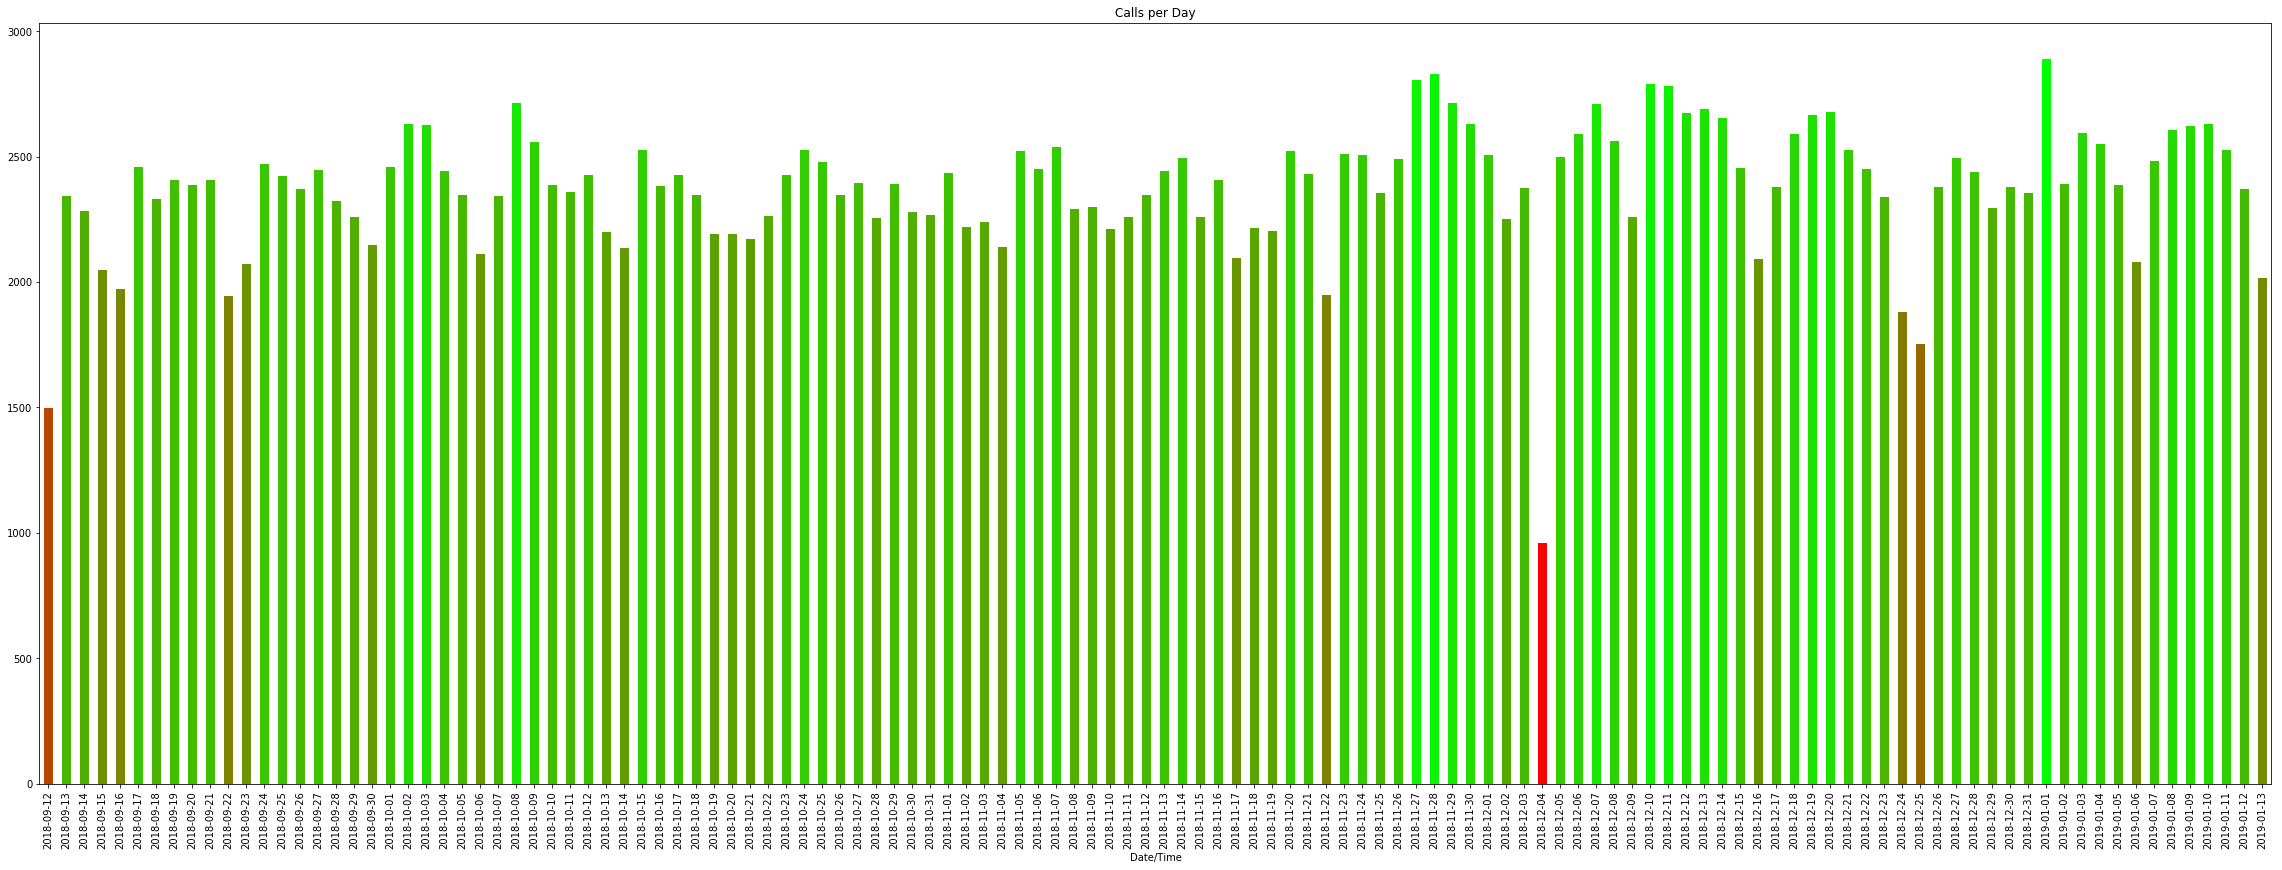

In [14]:
%matplotlib inline
maxCalls = callsPerDay.max()
minCalls = callsPerDay.min()
delta = maxCalls - minCalls
colors = [(1 - (calls - minCalls)/delta, (calls - minCalls)/delta, 0) for calls in callsPerDay] # <-- Quick gradient example along the Red/Green dimensions.
callsPerDay.plot(kind='bar', figsize=(40,14), color=colors, title='Calls per Day')

In [15]:
callsPerDay.nsmallest(10)

Date/Time
2018-12-04     959
2018-09-12    1498
2018-12-25    1752
2018-12-24    1882
2018-09-22    1946
2018-11-22    1948
2018-09-16    1971
2019-01-13    2015
2018-09-15    2048
2018-09-23    2070
Name: Call Number, dtype: int64

In [16]:
callsPerDay.describe()

count     124.000000
mean     2375.814516
std       253.842066
min       959.000000
25%      2259.750000
50%      2390.000000
75%      2522.250000
max      2889.000000
Name: Call Number, dtype: float64

In [17]:
callsPerWeek = df.groupby([pd.to_datetime(df['Date/Time']).dt.year, pd.to_datetime(df['Date/Time']).dt.week])['Call Number'].count()

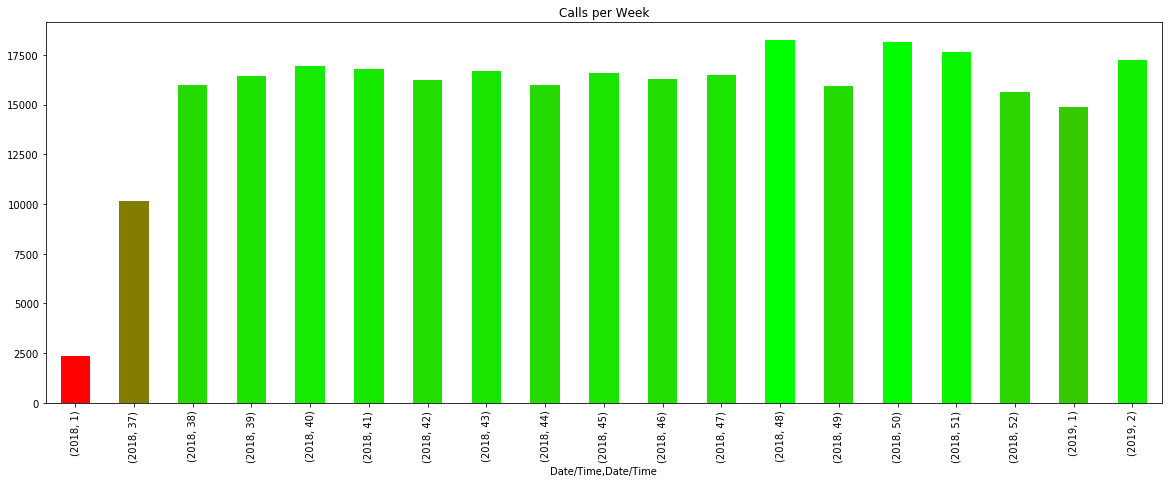

In [18]:
%matplotlib inline
maxCalls = callsPerWeek.max()
minCalls = callsPerWeek.min()
delta = maxCalls - minCalls
colors = [(1 - (calls - minCalls)/delta, (calls - minCalls)/delta, 0) for calls in callsPerWeek] # <-- Quick gradient example along the Red/Green dimensions.
callsPerWeek.plot(kind='bar', figsize=(20,7), color=colors, title='Calls per Week')

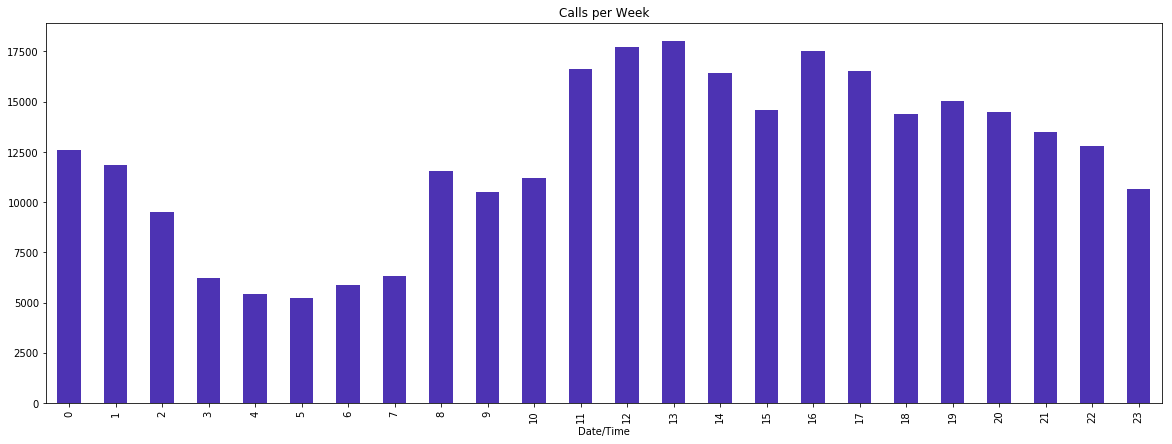

In [34]:
callsPerHour = df.groupby(pd.to_datetime(df['Date/Time']).dt.hour)['Call Number'].count()
callsPerHour.plot(kind='bar', figsize=(20,7), color=[(0.3, 0.2, 0.7)], title='Calls per Week')